# Imports

In [192]:
!pip install lightgbm

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)


In [193]:
import pandas as pd
from sklearn.pipeline import Pipeline
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

In [133]:
train_df = pd.read_csv(r'C:\Users\arq_c\Desktop\ds_projects\kaggle_titanic\titanic\train.csv')
test_df = pd.read_csv(r'C:\Users\arq_c\Desktop\ds_projects\kaggle_titanic\titanic\test.csv')
target = pd.read_csv(r'C:\Users\arq_c\Desktop\ds_projects\kaggle_titanic\titanic\gender_submission.csv')

random_state = 12345

display(train_df)
print(train_df.info())
display(test_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [134]:
def col_standardize(df):
    """
    Standardizes the column names of a pandas DataFrame.

    This function takes a DataFrame and performs the following transformations
    on its column names:
    1. Converts all characters to lowercase.
    2. Removes any leading or trailing whitespace.

    Args:
        df: The input DataFrame with potentially non-standardized column names.

    Returns:
        df: The DataFrame with standardized column names. The original. DataFrame's columns are modified in place.
    """
    df.columns = df.columns.str.lower().str.strip()
    return df

In [135]:
col_standardize(train_df)
col_standardize(test_df)

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [136]:
nan_counts = train_df.isnull().sum()

print("NaN counts per column:")
print(nan_counts)

NaN counts per column:
passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64


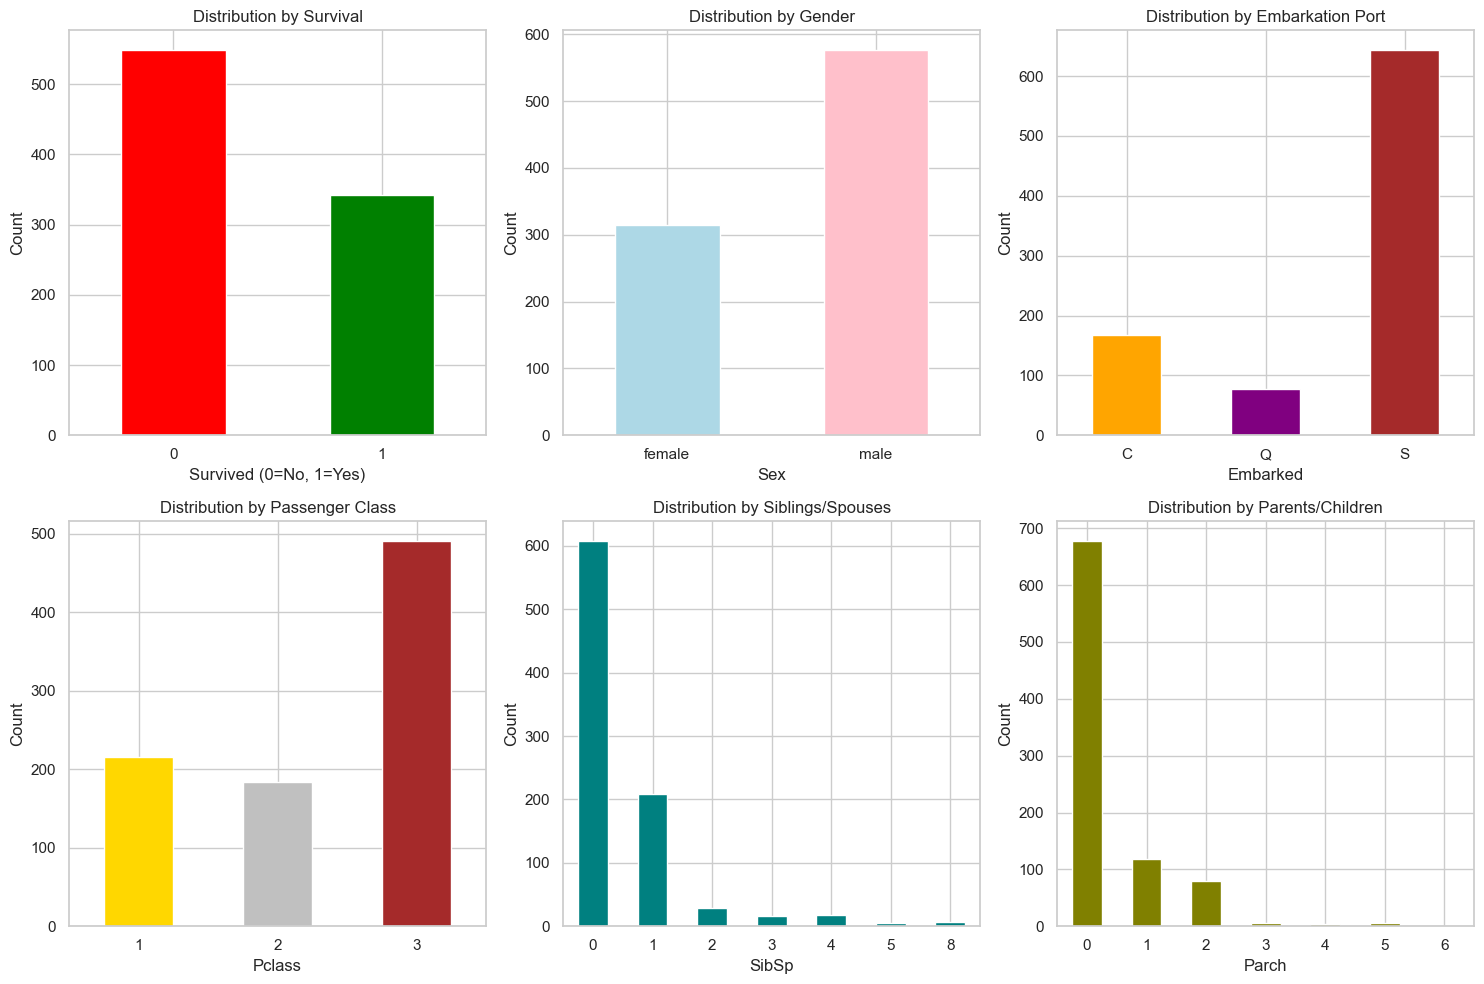

In [137]:


# Set up the plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# 1. Group by Survived
plt.subplot(2, 3, 1)
train_df.groupby('survived').size().plot(kind='bar', color=['red', 'green'])
plt.title('Distribution by Survival')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 2. Group by Sex
plt.subplot(2, 3, 2)
train_df.groupby('sex').size().plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Distribution by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 3. Group by Embarked
plt.subplot(2, 3, 3)
train_df.groupby('embarked').size().plot(kind='bar', color=['orange', 'purple', 'brown'])
plt.title('Distribution by Embarkation Port')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 4. Group by Pclass
plt.subplot(2, 3, 4)
train_df.groupby('pclass').size().plot(kind='bar', color=['gold', 'silver', 'brown'])
plt.title('Distribution by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 5. Group by SibSp
plt.subplot(2, 3, 5)
train_df.groupby('sibsp').size().plot(kind='bar', color='teal')
plt.title('Distribution by Siblings/Spouses')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 6. Group by Parch
plt.subplot(2, 3, 6)
train_df.groupby('parch').size().plot(kind='bar', color='olive')
plt.title('Distribution by Parents/Children')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

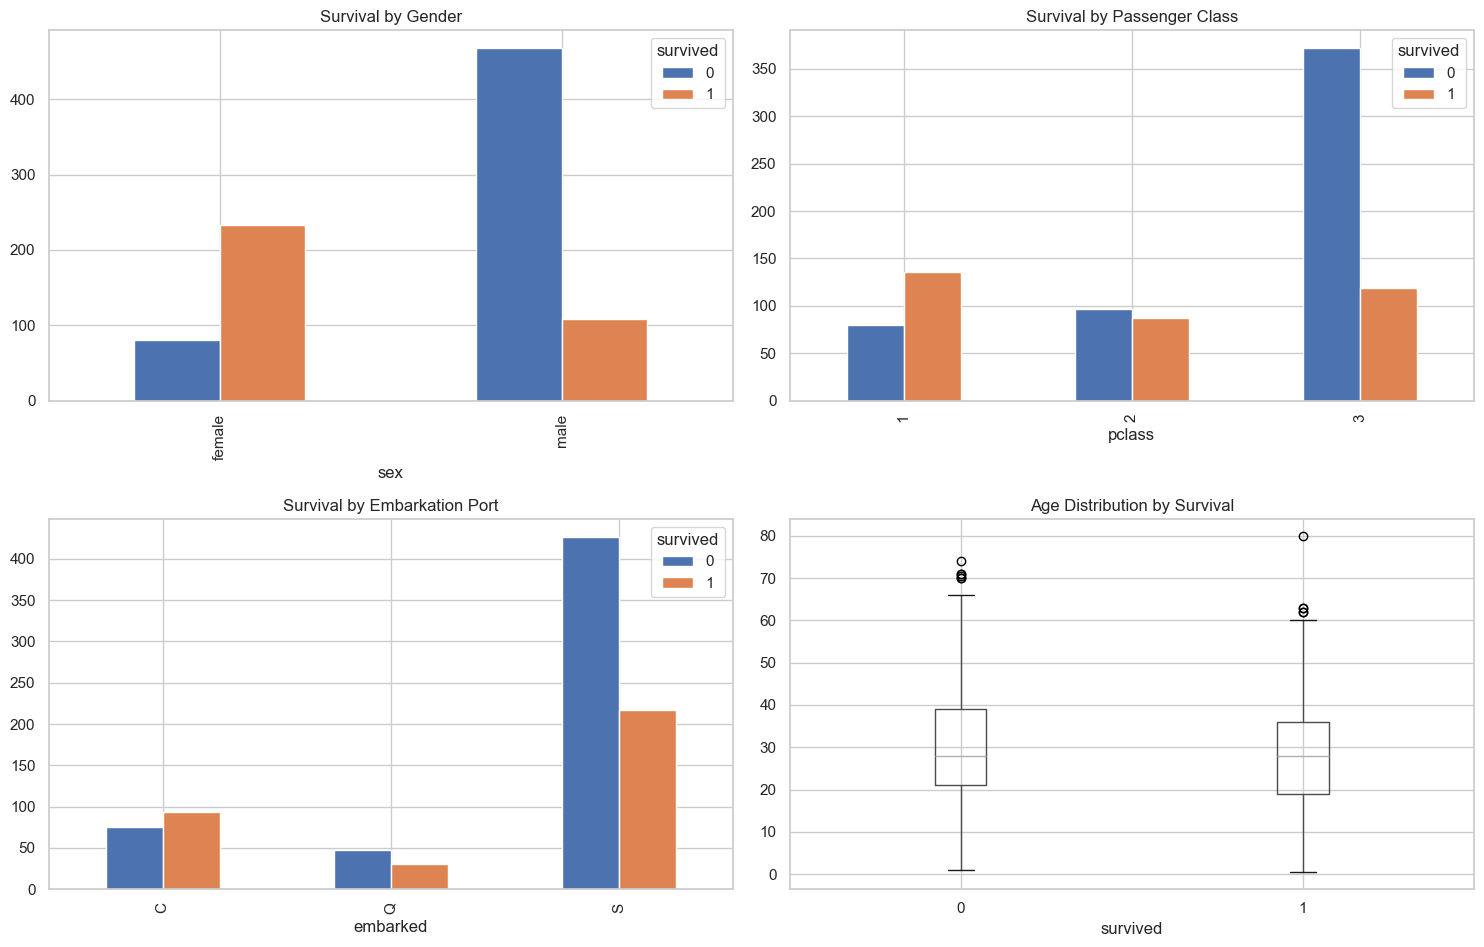

In [138]:
# Survival rate by different factors
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Survival by Sex
train_df.groupby(['sex', 'survived']).size().unstack().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Survival by Gender')

# Survival by Pclass
train_df.groupby(['pclass', 'survived']).size().unstack().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Survival by Passenger Class')

# Survival by Embarked
train_df.groupby(['embarked', 'survived']).size().unstack().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Survival by Embarkation Port')

# Age distribution by Survival
train_df[train_df['age'].notna()].boxplot(column='age', by='survived', ax=axes[1,1])
axes[1,1].set_title('Age Distribution by Survival')

plt.tight_layout()
plt.suptitle('')  # Remove automatic title
plt.show()

In [139]:
female_entries = train_df.loc[train_df.sex =='female', 'survived']
percent_women = sum(female_entries)/len(female_entries) # Porque se tiene valores 0 y 1
print(f'Porcentaje mujeres que sobrevivieron (train_df): {percent_women*100:.2f}%')
print(train_df.loc[train_df.sex == 'female'].shape[0]) # Conteo de mujeres

male_entries = train_df.loc[train_df.sex == 'male', 'survived']
percent_male = sum(male_entries)/len(male_entries)
print(f'Porcentaje hombres que sobrevivieron (train_df): {percent_male*100:.2f}%')
# print(percent_women + percent_male)
print(train_df.loc[train_df.sex == 'male'].shape[0]) # Conteo de hombres

Porcentaje mujeres que sobrevivieron (train_df): 74.20%
314
Porcentaje hombres que sobrevivieron (train_df): 18.89%
577


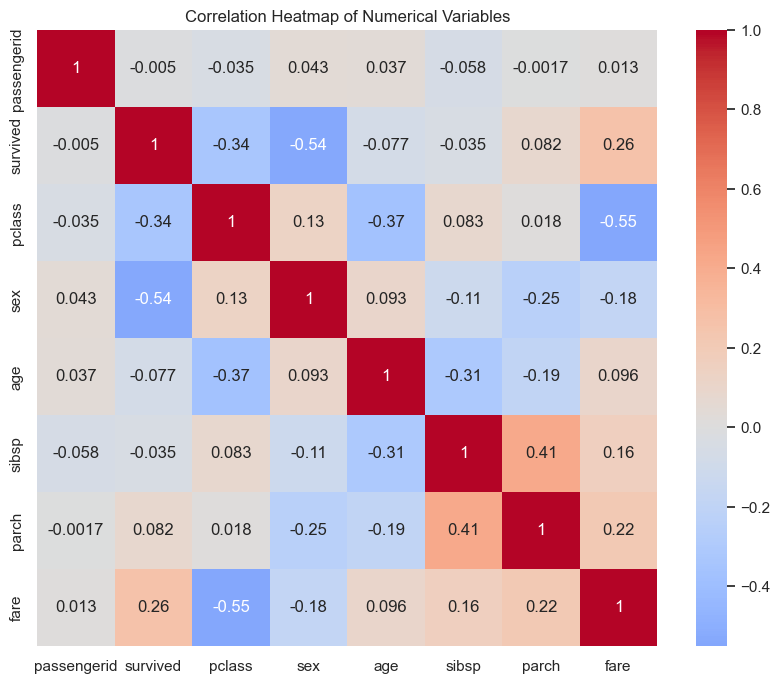

In [140]:
le = LabelEncoder()
# Correlation heatmap
plt.figure(figsize=(10, 8))
train_df_copy_hm = train_df.copy() # Copia del train_df para evitar cambiar el dataframe original
train_df_copy_hm['sex'] = le.fit_transform(train_df_copy_hm['sex'])
numeric_df = train_df_copy_hm.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Notes

After reviewing the correlation matrix we can assert that `pcclass`, `sex`, `sibsp`, `age` and `parch`  have potential relevant information for the model. However, `age` has **177** missing values. So I will train the models with two data sets, a; excluding `age` as feature and b; including `age` as feature but excluding missing values.  

# Model RandomForestClassifier a

In [141]:
param_dist = {
    "n_estimators":      [50, 100, 150, 200],       # number of trees
    "max_depth":         [3, 5, 7, None],          
    "min_samples_split": [2, 5, 10],               # minimum #samples to split an internal node
    "min_samples_leaf":  [1, 2, 4],                # minimum #samples per leaf
    "max_features":      ["sqrt", "log2", 0.6, 0.8],  # #features considered at each split
    "class_weight":      [None, "balanced"]       # helpful if classes are imbalanced
}

In [162]:
train_df.info()
test_df.info()
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  418 non-null    int64  
 1   pclass  

In [143]:
y = train_df['survived']

features_a = ['pclass', 'sex', 'sibsp', 'parch'] # features model a
features_b = ['pclass', 'sex', 'sibsp', 'parch', 'age'] # features model b

X_train = pd.get_dummies(train_df[features_a])
X_test = pd.get_dummies(test_df[features_a])

In [144]:
rfc_a = RandomForestClassifier(random_state=random_state, n_jobs=-1, bootstrap=True)

In [145]:
search = RandomizedSearchCV(
    estimator=rfc_a,
    param_distributions=param_dist,
    n_iter=30,               # 30 different models
    scoring="accuracy",      # change to "roc_auc" or others if needed
    cv=5,                    # 5‑fold cross‑validation
    verbose=1,
    random_state=random_state,
    n_jobs=-1                # parallelise the CV folds
)

In [146]:
search.fit(X_train, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=12345),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'max_depth': [3, 5, 7, None],
                                        'max_features': ['sqrt', 'log2', 0.6,
                                                         0.8],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=12345, scoring='accuracy', verbose=1)

In [147]:
print("Best hyper‑parameters:")
print(search.best_params_)
best_rfc_a = search.best_estimator_

Best hyper‑parameters:
{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.6, 'max_depth': 3, 'class_weight': None}


In [148]:
predictions_a = best_rfc_a.predict(X_test)

In [149]:
y_test = target['Survived']

In [150]:
print("Test accuracy:", accuracy_score(y_test, predictions_a))

Test accuracy: 0.9880382775119617


# Model RandomForestClassifier b

In [151]:
X_train_b = pd.get_dummies(train_df[features_b])
X_test_b = pd.get_dummies(test_df[features_b])

In [152]:
# Drop NaN
X_train.dropna()
# X_test.dropna()

,pclass,sibsp,parch,sex_female,sex_male
0,3,1,0,False,True
1,1,1,0,True,False
2,3,0,0,True,False
3,1,1,0,True,False
4,3,0,0,False,True
...,...,...,...,...,...
886,2,0,0,False,True
887,1,0,0,True,False
888,3,1,2,True,False
889,1,0,0,False,True


In [153]:
search.fit(X_train_b, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=12345),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'max_depth': [3, 5, 7, None],
                                        'max_features': ['sqrt', 'log2', 0.6,
                                                         0.8],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=12345, scoring='accuracy', verbose=1)

In [154]:
best_rfc_b = search.best_estimator_

In [155]:
X_test_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      418 non-null    int64  
 1   sibsp       418 non-null    int64  
 2   parch       418 non-null    int64  
 3   age         332 non-null    float64
 4   sex_female  418 non-null    bool   
 5   sex_male    418 non-null    bool   
dtypes: bool(2), float64(1), int64(3)
memory usage: 14.0 KB


In [156]:
predictions_b = best_rfc_b.predict(X_test_b)

In [157]:
print("Test accuracy:", accuracy_score(y_test, predictions_b))

Test accuracy: 0.8923444976076556


# Notes

- Test accuracy model a: 0.9880382775119617
- Test accuracy model b: 0.8923444976076556

# C option for RFC

In [158]:
# Prediction on data set b with hyperparameters of model a
rfc_c = RandomForestClassifier(max_depth=3, max_features=0.6, min_samples_split=5,
                       n_estimators=50, n_jobs=-1, random_state=12345)

In [159]:
rfc_c.fit(X_train_b, y)

RandomForestClassifier(max_depth=3, max_features=0.6, min_samples_split=5,
                       n_estimators=50, n_jobs=-1, random_state=12345)

In [160]:
predictions_c = rfc_c.predict(X_test_b)
print("Test accuracy:", accuracy_score(y_test, predictions_b)) # No changes

Test accuracy: 0.8923444976076556


In [163]:
output = pd.DataFrame({'PassengerId': test_df.passengerid, 'Survived': predictions_a})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Model KNN

In [168]:
knn_pipe = Pipeline(steps=[("scaler", StandardScaler()),("knn", KNeighborsClassifier())])

In [171]:
knn_param_dist = {
    "knn__n_neighbors":   list(range(1, 31)),        # 1‑30 neighbours
    "knn__weights":       ["uniform", "distance"],   # voting scheme
    "knn__p":             [1, 2],                  # Manhattan (1) or Euclidean (2)
    "knn__leaf_size":    list(range(10, 61, 10)),  # affects tree‑search speed
    "knn__metric":       ["minkowski"],           # keep it simple for now
}
knn_search = RandomizedSearchCV(
    estimator=knn_pipe,
    param_distributions=knn_param_dist,
    n_iter=30,                
    scoring="roc_auc",       # change to "roc_auc" for binary problems
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    refit=True                # automatically refit on the whole train split
)

In [172]:
knn_search.fit(X_train, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('knn', KNeighborsClassifier())]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'knn__leaf_size': [10, 20, 30, 40, 50,
                                                           60],
                                        'knn__metric': ['minkowski'],
                                        'knn__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30],
                                        'knn__p': [1, 2],
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   random_state=42, scoring='roc_auc', verbose=1)

In [181]:
knn_model = knn_search.best_estimator_
predictions_knn = knn_model.predict(X_test)

In [182]:
# print(f"Accuracy    : {accuracy_score(y_test, predictions_knn): .4f}")
print(f"ROC‑AUC    : {roc_auc_score(y_test, predictions_knn): .4f}")

ROC‑AUC    :  0.9554


In [183]:
output_knn = pd.DataFrame({'PassengerId': test_df.passengerid, 'Survived': predictions_knn})
output_knn.to_csv('submission_knn.csv', index=False)

# Model LGB

In [206]:
X_lgb = train_df[features_a]


In [207]:
categorical_features = ['sex']  # This is your categorical column
numerical_features = ['pclass', 'sibsp', 'parch']  # These are your numerical columns

In [208]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

In [210]:
lgb_clf = lgb.LGBMClassifier(
    objective='binary',        
    random_state=42,
    n_jobs=-1,
    metric='binary_logloss' 
)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lgb_clf)
])

In [ ]:
print(X_lgb.columns.tolist())

['pclass', 'sex', 'sibsp', 'parch']


In [211]:
pipeline.fit(X_lgb, y)
best_model = pipeline

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [212]:
lgb_predict = knn_model.predict(X_test)

In [213]:
print(f"ROC-AUC: {roc_auc_score(y_test, lgb_predict):.4f}")

ROC-AUC: 0.9554


In [214]:
lgb_output = pd.DataFrame({'PassengerId': test_df.passengerid, 'Survived': lgb_predict})
output.to_csv('lgb_submission.csv', index=False)